In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

from datetime import datetime
sns.set()

### Importing the Data

In [2]:
raw_csv_data = pd.read_csv('data/BTCUSDT.csv', index_col=0)
btc_data = raw_csv_data.copy()

In [3]:
btc_data.head()

,Open time,Open,High,Low,Close,Volume
0,1514678400000,12345.10,12397.16,12337.60,12347.99,6.884066
1,1514678460000,12337.60,12348.00,12300.07,12300.14,3.302100
2,1514678520000,12302.32,12337.19,12299.98,12311.15,8.647718
3,1514678580000,12311.12,12345.84,12311.00,12329.76,5.375271
4,1514678640000,12319.28,12341.45,12287.89,12311.02,12.270461


In [4]:
from datetime import datetime


date = [datetime.utcfromtimestamp(btc_data["Open time"][X]//1000).strftime('%Y-%m-%d_%H:%M:%S') for X in range(len(btc_data))]

btc_data["Date"]=date

In [5]:
btc_data = btc_data[['Open time',"Date", 'Open', 'High', 'Low', 'Close',"Volume"]]

btc_data

,Open time,Date,Open,High,Low,Close,Volume
0,1514678400000,2017-12-31_00:00:00,12345.10,12397.16,12337.60,12347.99,6.884066
1,1514678460000,2017-12-31_00:01:00,12337.60,12348.00,12300.07,12300.14,3.302100
2,1514678520000,2017-12-31_00:02:00,12302.32,12337.19,12299.98,12311.15,8.647718
3,1514678580000,2017-12-31_00:03:00,12311.12,12345.84,12311.00,12329.76,5.375271
4,1514678640000,2017-12-31_00:04:00,12319.28,12341.45,12287.89,12311.02,12.270461
...,...,...,...,...,...,...,...
2243607,1649773920000,2022-04-12_14:32:00,39893.26,39916.42,39878.76,39910.00,41.412350
2243608,1649773980000,2022-04-12_14:33:00,39909.99,39933.52,39905.32,39908.10,34.018590
2243609,1649774040000,2022-04-12_14:34:00,39908.10,39970.00,39908.10,39957.97,33.642590
2243610,1649774100000,2022-04-12_14:35:00,39957.96,40064.08,39957.96,40026.96,167.133340


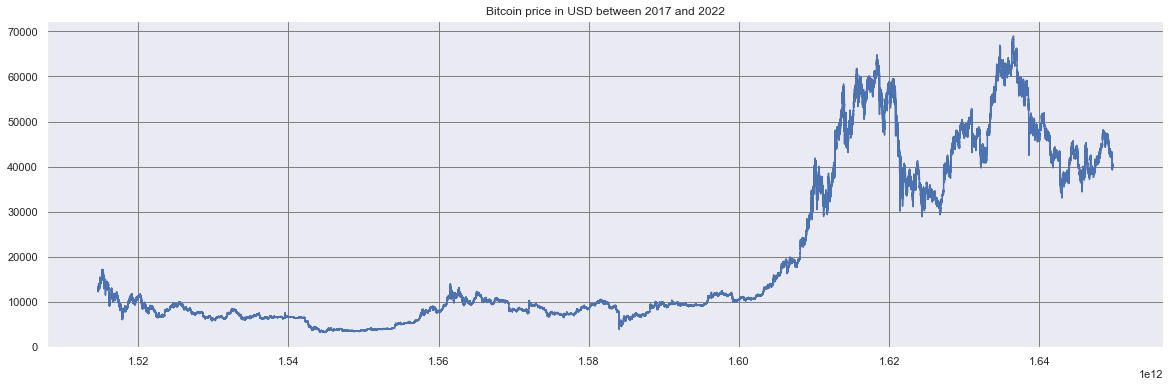

In [6]:
import matplotlib.pyplot as plt 

X = btc_data["Open time"] 
Y = btc_data.Close

plt.figure(figsize=(20,6))
plt.plot(X,Y) 
plt.title("Bitcoin price in USD between 2017 and 2022")
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.show()

# Create different timeframes 

In [8]:
minutes = [5,15,60,240,24*60]
names = ["5min","15min","1h","4h","1d"]

for minute,name in zip(minutes,names): 
    data_list = []
    for i in range(0,len(btc_data),minute): 
        open_time = btc_data["Open time"][i]
        date = btc_data["Date"][i]
        open_price = btc_data["Open"][i]
        close_price = btc_data["Close"][int(min(i+minute,len(btc_data)-1))]
        high_price = max(btc_data["High"][i:int(min(i+minute,len(btc_data)-1))])
        low_price = min(btc_data["Low"][i:int(min(i+minute,len(btc_data)-1))])
        volume = sum(btc_data["Volume"][i:int(min(i+minute,len(btc_data)-1))])
        data_list.append([open_time,date,open_price,high_price,low_price,close_price,volume])
    df = pd.DataFrame(data_list,columns = ["Open time","Date","Open","High","Low","Close","Volume"])
    df.to_csv(f"data/BTCUSDT-{name}.csv")